In [3]:
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
import matplotlib.pyplot as plt

import calendar

data_17_08 = pd.read_csv('../data/properati/properati-AR-2017-08-01-properties-sell.csv')
data_17_02 = pd.read_csv('../data/properati/properati-AR-2017-02-01-properties-sell.csv')
data_16_08 = pd.read_csv('../data/properati/properati-AR-2016-08-01-properties-sell.csv')
data_16_02 = pd.read_csv('../data/properati/properati-AR-2016-02-01-properties-sell.csv')
data_15_08 = pd.read_csv('../data/properati/properati-AR-2015-08-01-properties-sell.csv')
data_15_02 = pd.read_csv('../data/properati/properati-AR-2015-02-01-properties-sell.csv')
data_14_08 = pd.read_csv('../data/properati/properati-AR-2014-08-01-properties-sell.csv')
data_14_02 = pd.read_csv('../data/properati/properati-AR-2014-02-01-properties-sell.csv')
data_13_08 = pd.read_csv('../data/properati/properati-AR-2013-08-01-properties-sell.csv')

In [4]:
data1_frames = [data_17_08, data_17_02, data_16_08, data_16_02]
data1 = pd.concat(data1_frames)

In [5]:
# sacamos la columna id
data1 = data1.drop(['id'], axis=1)

In [6]:
data2_frames = [data_15_08, data_15_02, data_14_08, data_14_02, data_13_08]
data2 = pd.concat(data2_frames)

In [7]:
data_frames = [data1, data2]
data = pd.concat(data_frames)

# Estructura de los datos

In [7]:
data.head(3)

,country_name,created_on,currency,description,expenses,extra,floor,geonames_id,image_thumbnail,lat,...,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title
0,Argentina,2012-09-19,USD,CASA CON LOCAL EN VENTA EN PADUA.2 DORMITORIOS...,NaN,NaN,NaN,3429244.0,https://thumbs4.properati.com/1/ufoyqwscVk8n3e...,NaN,...,1290.322581,360.36036,http://www.properati.com.ar/udh_venta_casa_mer...,house,NaN,Bs.As. G.B.A. Zona Oeste,93.0,NaN,333.0,CASA EN VENTA
1,Argentina,2012-10-22,USD,CHALET VENTA 4 AMBIENTES PADUA.EXCELENTE CHALE...,NaN,NaN,NaN,3429244.0,https://thumbs4.properati.com/5/I5RS_jAIUseo9H...,NaN,...,1000.000000,1000.00000,http://www.properati.com.ar/20hi_venta_casa_me...,house,NaN,Bs.As. G.B.A. Zona Oeste,220.0,NaN,220.0,CASA EN VENTA
2,Argentina,2012-11-01,NaN,DTO. 2 AMB. C/ VISTA PLENA AL 6 X 3DOMITORIO ...,NaN,NaN,NaN,3430863.0,https://thumbs4.properati.com/5/VjDOdzm9n8uqZu...,-38.019951,...,NaN,NaN,http://www.properati.com.ar/336o_venta_departa...,apartment,2.0,Buenos Aires Costa Atlántica,42.0,NaN,NaN,DTO. 2 AMB. C/ VISTA PLENA AL MAR


In [10]:
data.dtypes

country_name                   object
created_on                     object
currency                       object
description                    object
expenses                       object
extra                          object
floor                         float64
geonames_id                   float64
image_thumbnail                object
lat                           float64
lat-lon                        object
lon                           float64
operation                      object
place_name                     object
place_with_parent_names        object
price                         float64
price_aprox_local_currency    float64
price_aprox_usd               float64
price_per_m2                  float64
price_usd_per_m2              float64
properati_url                  object
property_type                  object
rooms                         float64
state_name                     object
surface_covered_in_m2         float64
surface_in_m2                 float64
surface_tota

In [10]:
# formato de fechas
data.created_on = pd.to_datetime(data.created_on, format='%Y/%m/%d')
data['year'] = data['created_on'].map(lambda x: x.year)
data['month'] = data.created_on.dt.month.apply(lambda x: calendar.month_name[x])

In [12]:
#Cuantos lugares (o provincias) reflejan los avisos
data['state_name'].value_counts()

Capital Federal                 78606
Bs.As. G.B.A. Zona Norte        74991
Bs.As. G.B.A. Zona Oeste        42015
Buenos Aires Costa Atlántica    37457
Bs.As. G.B.A. Zona Sur          28232
Córdoba                         24663
Santa Fe                        21276
Buenos Aires Interior            9546
Mendoza                          1936
Río Negro                        1885
Misiones                         1714
Neuquén                          1683
Entre Ríos                       1626
Tucumán                          1133
San Luis                          762
Salta                             707
Corrientes                        693
La Pampa                          620
Chubut                            446
Catamarca                         334
Chaco                             173
San Juan                          138
Tierra Del Fuego                  134
Jujuy                              80
Santa Cruz                         69
Formosa                            66
La Rioja    

In [5]:
# Filtro por Capital Federal y GBA
data = data.loc[(data.state_name=='Capital Federal') | (data.state_name.str.contains('G.B.A'))]

In [14]:
data.isnull().sum()

country_name                       0
created_on                         0
currency                       26919
description                       16
expenses                      197677
extra                         223844
floor                         200618
geonames_id                    47886
image_thumbnail                 4523
lat                            71651
lat-lon                        71651
lon                            71651
operation                          0
place_name                        54
place_with_parent_names            0
price                          23435
price_aprox_local_currency     23435
price_aprox_usd                23435
price_per_m2                   49583
price_usd_per_m2               85765
properati_url                      0
property_type                      0
rooms                         115319
state_name                         0
surface_covered_in_m2          29197
surface_in_m2                 223844
surface_total_in_m2            62816
t

In [15]:
data.describe()

,floor,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,price_per_m2,price_usd_per_m2,rooms,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,year
count,23226.000000,1.759580e+05,152193.000000,152193.000000,2.004090e+05,2.004090e+05,2.004090e+05,1.742610e+05,1.380790e+05,108525.000000,194647.000000,0.0,161028.000000,223844.00000
mean,17.799836,3.488861e+06,-34.587684,-58.513448,3.382800e+05,4.345470e+06,2.567219e+05,4.453948e+03,2.026821e+03,2.988030,150.070451,NaN,265.065603,2016.30515
std,126.350565,4.032057e+05,0.849350,0.704857,7.763883e+05,6.636703e+06,3.928122e+05,1.973984e+04,5.306152e+03,1.490981,3272.695499,NaN,1674.710127,0.75282
min,1.000000,3.427208e+06,-41.167596,-122.419415,0.000000e+00,0.000000e+00,0.000000e+00,6.275958e-02,0.000000e+00,1.000000,0.000000,NaN,0.000000,2012.00000
25%,2.000000,3.429617e+06,-34.639315,-58.587002,1.000000e+05,1.593656e+06,9.500000e+04,1.521739e+03,1.085714e+03,2.000000,47.000000,NaN,52.000000,2016.00000
50%,3.000000,3.430787e+06,-34.600007,-58.480858,1.700000e+05,2.646675e+06,1.580000e+05,2.096154e+03,1.760000e+03,3.000000,80.000000,NaN,99.000000,2016.00000
75%,6.000000,3.435506e+06,-34.547926,-58.412990,3.300000e+05,4.940460e+06,2.900000e+05,2.933333e+03,2.450000e+03,4.000000,167.000000,NaN,248.000000,2017.00000
max,7071.000000,6.693230e+06,52.619706,5.011710,1.234568e+08,8.212711e+08,5.000000e+07,4.000000e+06,1.271027e+06,32.000000,987897.000000,NaN,200000.000000,2017.00000


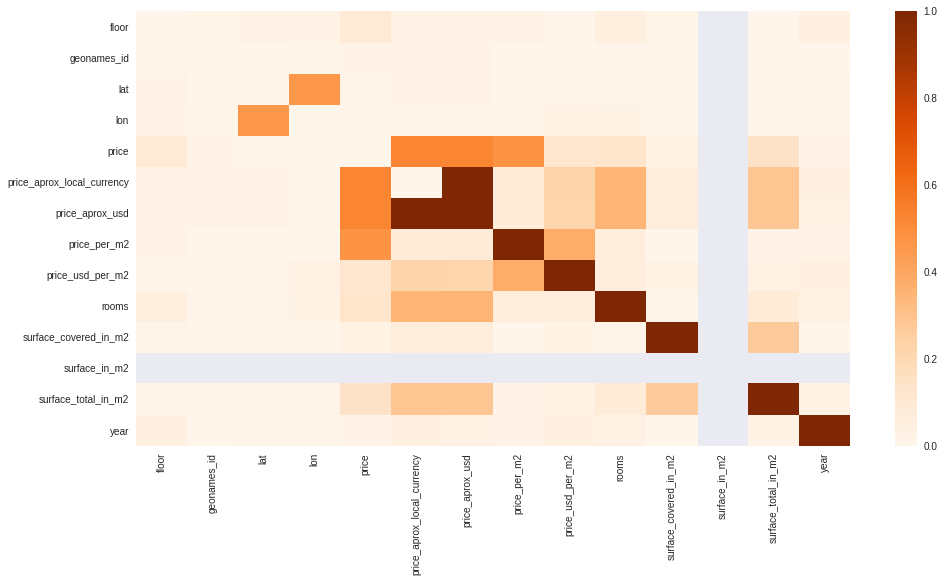

In [13]:
# este podríamos sacarlo No sé, capaz que hay que agregarle el place_name,
fig, ax = plt.subplots(figsize=(16,8))
cor = data.corr().abs()
cor.values[[np.arange(6)]*2] = 0
sns.heatmap(cor,cmap='Oranges');

# Qué cantidad de avisos se registraron por año?

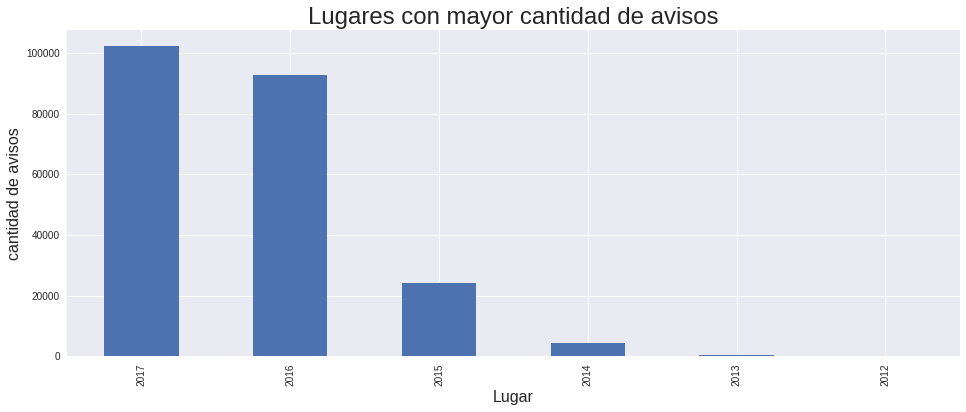

In [132]:
fig = plt.figure()

ax = data['year'].value_counts()[0:6].plot(kind='bar',figsize=(16,6));

plt.title('Lugares con mayor cantidad de avisos', fontsize=24)

ax.set_xlabel('Lugar', fontsize= 16)
ax.set_ylabel('cantidad de avisos', fontsize= 16)

fig.savefig('top20CantidadDeAvisos.jpg');

In [ ]:
# puede obsevase que la mayor cantidad de avisos se publicaron en el año 2017, si bien es poca la diferencia
# con respecto al año 2016 esta diferencia podría ser aún mayor al terminar el año 2017 ya los datos registrados para este
# año son hasta agosto

# cuáles son los principales lugares donde se registró la mayor cantidad de avisos?

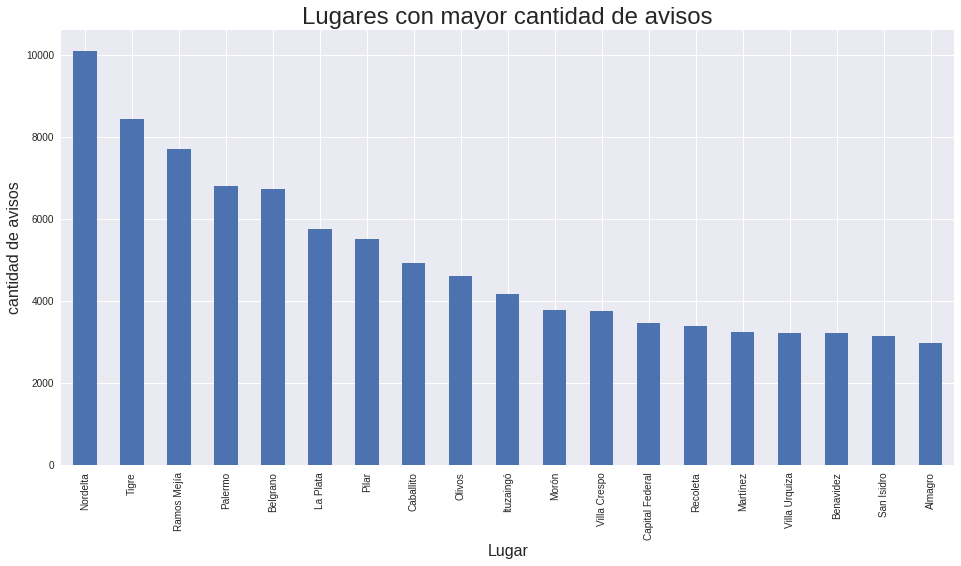

In [130]:
# top 20 lugares con mas ventas
fig = plt.figure()

plt.title('Lugares con mayor cantidad de avisos', fontsize=24)

ax = data['place_name'].value_counts()[0:19].plot(kind='bar',figsize=(16,8));

ax.set_xlabel('Lugar', fontsize= 16)
ax.set_ylabel('cantidad de avisos', fontsize= 16)

fig.savefig('top20CantidadDeAvisos.jpg');

# ¿Qué tipo de propiedad son las que más se publicaron?

In [154]:
apartment_year = data.loc[data.property_type == 'apartment',['year']]
house_year = data.loc[data.property_type == 'house',['year']]
ph_year = data.loc[data.property_type == 'PH',['year']]
store_year = data.loc[data.property_type == 'store',['year']]

In [155]:
data_apartment = apartment_year['year'].value_counts().sort_index()
data_house = house_year['year'].value_counts().sort_index()
data_ph = ph_year['year'].value_counts().sort_index()
data_store = store_year['year'].value_counts().sort_index()

data_apartment.rename('Apartment', inplace=True)
data_house.rename('House', inplace=True)
data_ph.rename('PH', inplace=True)
data_store.rename('Store', inplace=True)

data_by_year = pd.concat([data_apartment,data_house, data_ph, data_store], axis=1)
print('datos por año\n',data_by_year)

datos por año
       Apartment  House      PH   Store
2012        NaN      3     NaN     NaN
2013      193.0    181    34.0     9.0
2014     1768.0   2011   351.0   218.0
2015    12654.0   8938  1739.0   792.0
2016    49581.0  34067  5617.0  3300.0
2017    58816.0  34570  5551.0  3451.0


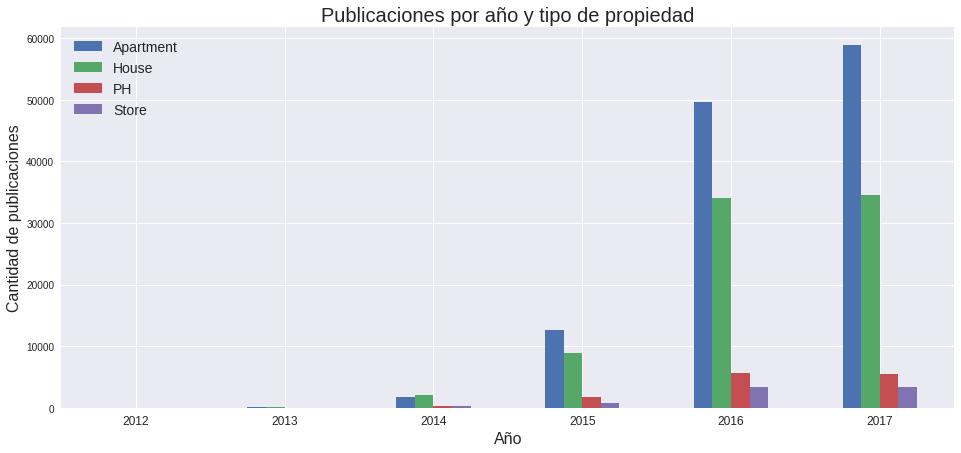

In [166]:
fig = plt.figure()

### no guarda el gráfico

year = ['2012','2013','2014','2015','2016','2017']

ax2 = data_by_year.plot(kind='bar', figsize=(16,7))

ax2.set_title('Publicaciones por año y tipo de propiedad', fontsize=20)
ax2.set_xlabel('Año', fontsize=16)
ax2.set_ylabel('Cantidad de publicaciones', fontsize=16)
ax2.set_xticklabels(year,rotation='horizontal', fontsize=12)
ax2.legend(prop={'size':14});

fig.savefig('publicacionesPorAnioYPropiedad.jpg');

# Porcentaje de los tipos de propiedades durante los años

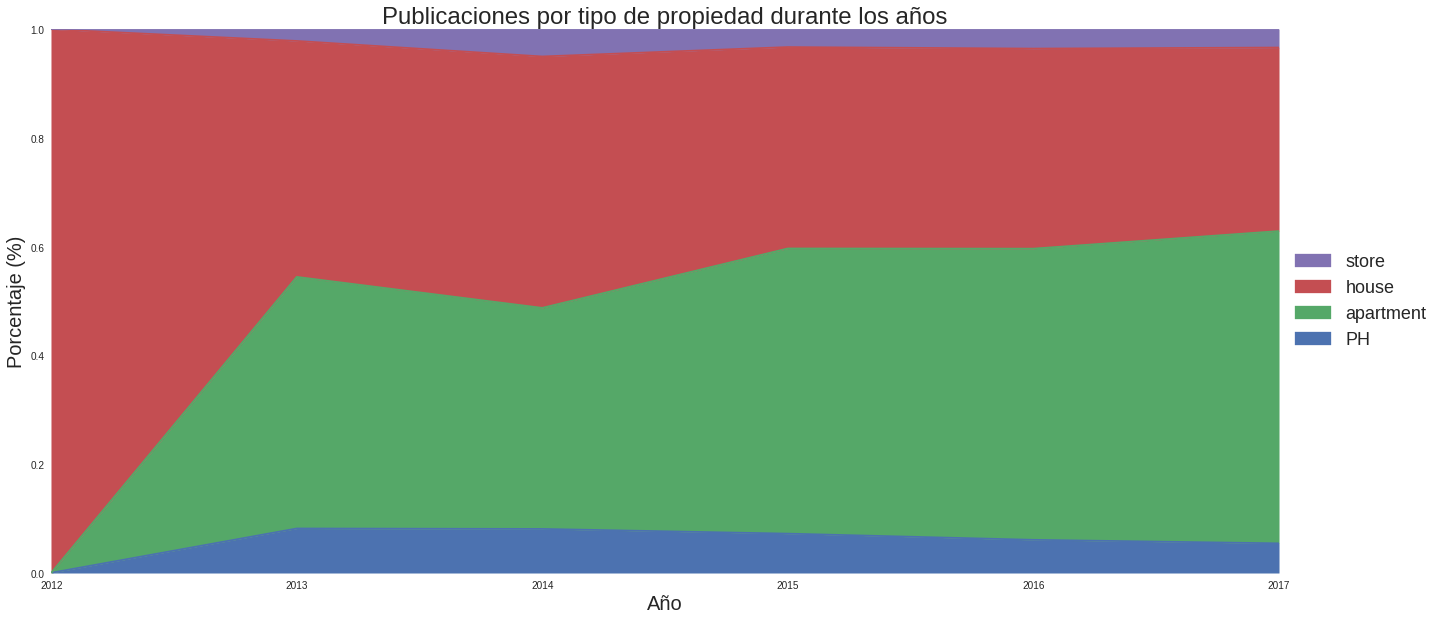

In [104]:
property_type_by_year = pd.DataFrame(data.groupby(['property_type','year']).size())
property_type_by_year.columns = ['num']

property_type_by_year.reset_index(inplace=True)

pivoted = pd.pivot_table(property_type_by_year,values='num',columns='property_type', index='year')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

fig = plt.figure()

plt.title('Publicaciones por tipo de propiedad durante los años', fontsize=24)
ax = pivoted.plot(kind='area', stacked=True,figsize=(22,10),ax=fig.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize= 18)
ax.set_ylabel('Porcentaje (%)', fontsize=20);
ax.set_xlabel('Año', fontsize=20);
ax.set_ylim(0,1)
plt.show()

fig.savefig('publicacionesPorTipoPropiedad.jpg');

# Superficie total promedio a través del tiempo

In [66]:
#Según el siguiente gráfico se muestra que en los primeros años (2013 a 2015) se ofrecían propiedades con menor superficie
# en m2, se tendría que analizar si se trataban de viviendas usadas o nuevas para concluir si en la actualidad
#se hicieron propiedades más grandes o si se están vendiendo más viviendas usadas 




grouped = data[['property_type','surface_total_in_m2','created_on']].dropna()
grouped.created_on = pd.to_datetime(grouped.created_on, format='%Y/%m/%d')
Prop_TotalSurf =grouped[['property_type','surface_total_in_m2']]
Prop_TotalSurf['Periodo'] = grouped['created_on'].map(lambda x: x.strftime('%Y-%m'))
#En algunos casos la superficie total era demasiada
#decidí tomar el promedio dentro de un rango de valores más o menos "usual"
Prop_TotalSurf = Prop_TotalSurf.loc[((Prop_TotalSurf.surface_total_in_m2<1000) &\
                                     (Prop_TotalSurf.surface_total_in_m2>100) &\
                                    (Prop_TotalSurf.property_type== 'house')) |\
                                    ((Prop_TotalSurf.surface_total_in_m2<500) &\
                                    ((Prop_TotalSurf.property_type== 'apartment')|\
                                     (Prop_TotalSurf.property_type== 'PH')) &\
                                    (Prop_TotalSurf.surface_total_in_m2>18))\
                                   ]

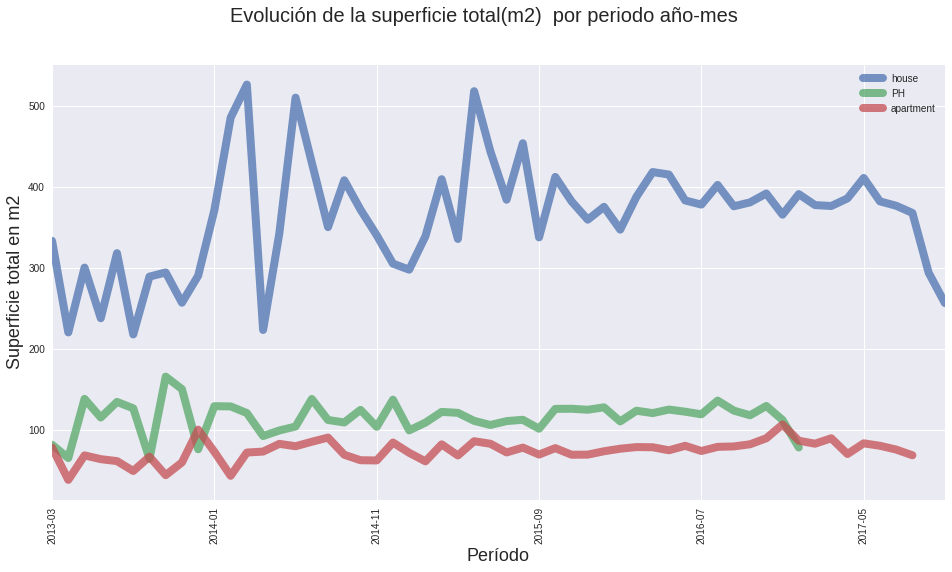

In [87]:
fig = plt.figure()

fig.suptitle('Evolución de la superficie total(m2)  por periodo año-mes', fontsize=20)

Prop_TotalSurf.loc[Prop_TotalSurf.property_type.str.contains('house'),['property_type','surface_total_in_m2','Periodo']].groupby('Periodo')\
                .mean().loc[:,'surface_total_in_m2'].plot(rot=90,linewidth=8,figsize=(16,8),alpha=0.75,label='house');

Prop_TotalSurf.loc[Prop_TotalSurf.property_type.str.contains('PH'),['property_type','surface_total_in_m2','Periodo']].groupby('Periodo')\
                .mean().loc[:,'surface_total_in_m2'].plot(rot=90,linewidth=8,figsize=(16,8),alpha=0.75,label='PH')

ax = Prop_TotalSurf.loc[Prop_TotalSurf.property_type.str.contains('apartment'),['property_type','surface_total_in_m2','Periodo']].groupby('Periodo')\
                .mean().loc[:,'surface_total_in_m2'].plot(rot=90,linewidth=8,figsize=(16,8),alpha=0.75,label='apartment')

ax.set_xlabel('Período', fontsize= 18)
ax.set_ylabel('Superficie total en m2', fontsize= 18)
    
plt.legend();

#fig.savefig('supTotalPorPeriodo.jpg');

In [3]:
#En qué moneda está fijado el precio de estas propiedades
data.drop_duplicates(keep='first').currency.value_counts()

USD    482524
ARS     68551
BRL        36
PEN         2
UYU         1
Name: currency, dtype: int64

# Cantidad de ambientes de los departamentos en venta

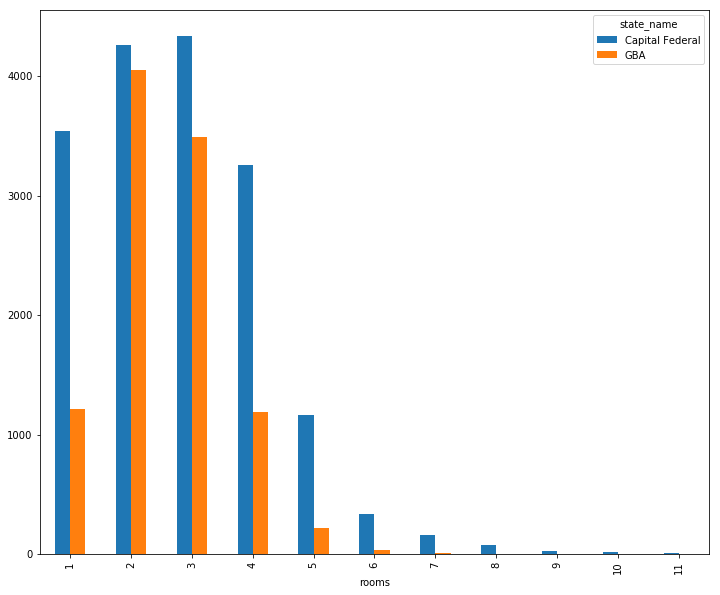

In [8]:
#En Capital Federal es más común encontrar departamentos con mayor cantidad de ambientes que en 
#GBA.Podrían tratarse de propiedades lujosas o de departamentos que no tienen tanta superficie total en m2
# y que tienen mayores divisiones ya que, por el gráfico de la superficie total en m2 a través del tiempo, 
#la superficie de los departamentos no presentó muchas variaciones a lo largo del tiempo.

rooms= data.loc[(data.property_type == 'apartment') & (data.rooms < 12),['rooms','state_name','surface_total_in_m2','created_on']].dropna().drop_duplicates(keep='first')
#Pongo todos los state_name que contengan G.B.A en uno solo
rooms.loc[rooms['state_name'].str.contains('G.B.A'),'state_name']= 'GBA'
#rooms es float, por lo tanto cambio a int para que se vea mejor en el gráfico
rooms.rooms = rooms.rooms.astype(int)
df=rooms.groupby(['rooms','state_name']).size()
df=df.unstack()
df.plot(kind='bar',figsize=(12,10))

# ¿Cuáles son los meses en los cuales se da la mayor cantidad de avisos?

In [33]:
data.month.value_counts()

July         55556
February     23091
June         17420
August       16919
January      16417
November     15493
May          14670
December     14127
April        14114
October      13316
March        13312
September     9409
Name: month, dtype: int64

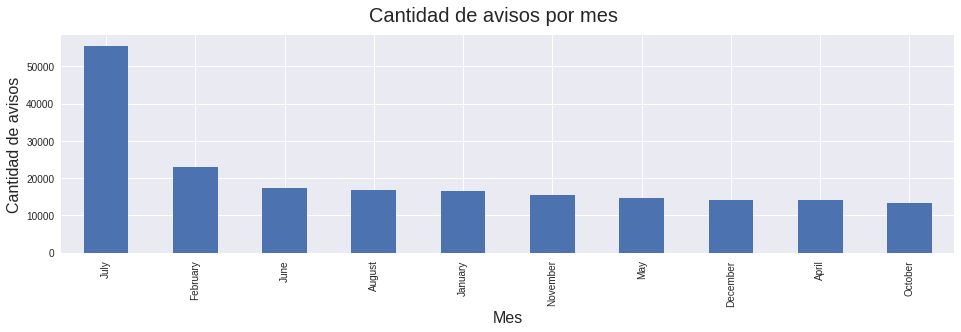

In [124]:
fig = plt.figure()

# para guardar el grafico figsize=(16,8)
ax = data.month.value_counts()[0:10].plot(kind='bar',figsize=(16,4));

fig.suptitle('Cantidad de avisos por mes', fontsize=20)
ax.set_xlabel('Mes', fontsize= 16)
ax.set_ylabel('Cantidad de avisos', fontsize= 16);

fig.savefig('avisosPorMes.jpg');

In [ ]:
# se puede pensar que el mes de julio donde mayor cantidad de avisos publicitarios coincide con el medio aguinaldo

In [108]:
# Heatmap - top 20 lugares con mas ventas por mes
import seaborn as sns

grouped = data[['place_name', 'month']].groupby(['place_name','month'])['place_name'].agg(['count'])
grouped_by_month = grouped.loc[grouped['count'] > 0,:].sort_values('count', ascending=False).head(20)
grouped_by_month = grouped_by_month.reset_index()

grouped_by_month

,place_name,month,count
0,Tigre,July,2233
1,Belgrano,July,2169
2,Palermo,July,2159
3,Nordelta,July,2152
4,Nordelta,February,1980
5,La Plata,July,1907
6,Ramos Mejía,July,1552
7,Caballito,July,1541
8,Pilar,July,1481
9,Lomas de Zamora,July,1445


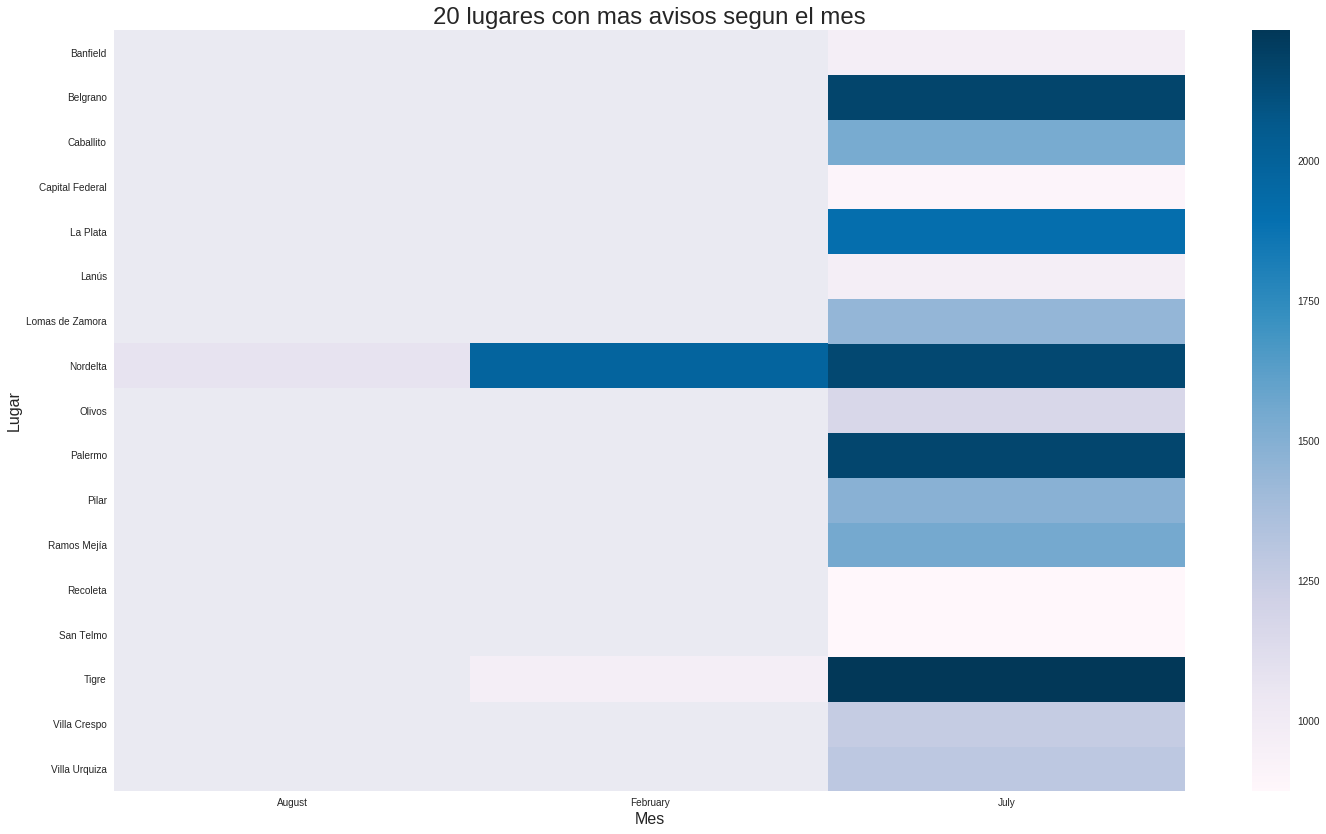

In [109]:
fig = plt.figure()

grouped_by_month = pd.pivot_table(grouped_by_month, values='count', columns='month', index='place_name')
fig, ax = plt.subplots(figsize=(24,14))

ax.set_title('20 lugares con mas avisos segun el mes', fontsize= 26)
sns.heatmap(grouped_by_month,cmap='PuBu', linecolor='red')
ax.set_xlabel('Mes', fontsize= 16)
ax.set_ylabel('Lugar', fontsize= 16)

fig.savefig('top20SegunMes.jpg');

# ¿En qué año y qué tipo de propiedad se registró la mayor cantidad de avisos?

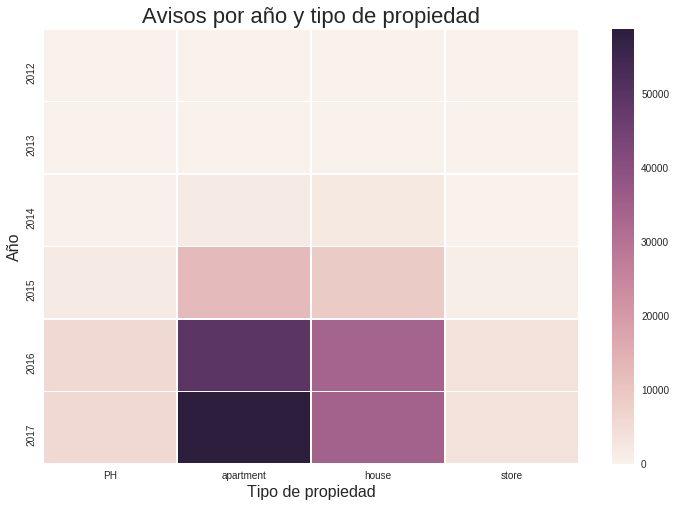

In [116]:
# cantidad de ventas año y tipo de propiedad
fig = plt.figure()

data_grouped = data.groupby(['year','property_type']).size().reset_index()
data_grouped.columns=['year','property_type','size']
data_grouped = data_grouped.pivot(index='year', columns='property_type',values='size')
data_grouped.fillna(0,inplace=True)
fig, ax = plt.subplots(figsize=(12,8))

sns.heatmap(data_grouped, annot=False, linewidths=.5, ax=ax)

ax.set_title('Avisos por año y tipo de propiedad', fontsize= 22)
ax.set_xlabel('Tipo de propiedad', fontsize= 16)
ax.set_ylabel('Año', fontsize= 16)

fig.savefig('ventasPorAnioYTipoPropiedad.jpg');

# ¿ Cantidad de publicaciones en  Capital Federal y G.B.A. ?

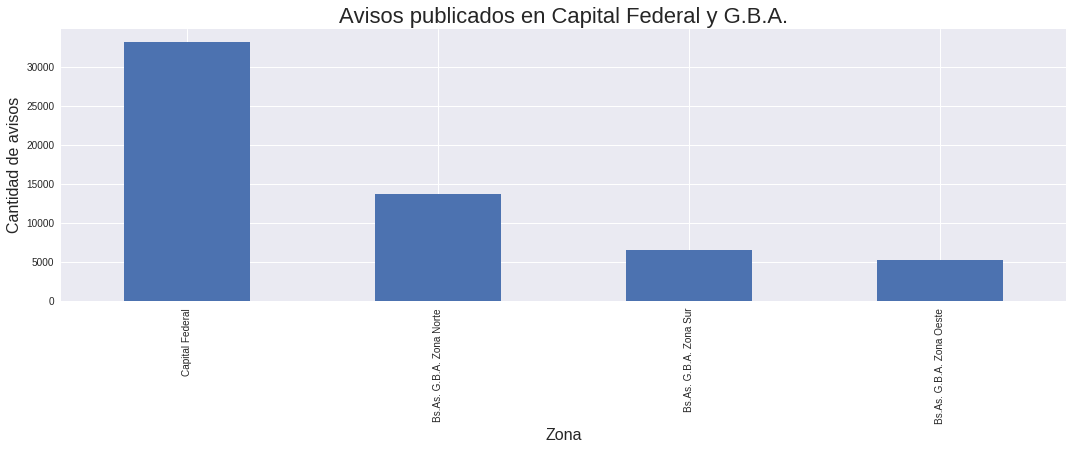

In [180]:
fig = plt.figure()

filtered = data.loc[(data.year == 2017) & (data.property_type == 'apartment')]

grouped = filtered[['state_name','price_usd_per_m2']].groupby('state_name').agg([np.size, np.mean])
# por lo menos 50 ventas
ax = grouped.loc[grouped[('price_usd_per_m2', 'size')] > 50, : ][('price_usd_per_m2','size')].sort_values(ascending=False)[0:20].plot(kind='bar',figsize=(18,5));

ax.set_title('Avisos publicados en Capital Federal y G.B.A.', fontsize= 22)
ax.set_xlabel('Zona', fontsize= 16)
ax.set_ylabel('Cantidad de avisos', fontsize= 16)

fig.savefig('avisos_cab_gba.jpg');

# Relación entre número de ambientes y valor de expensas 

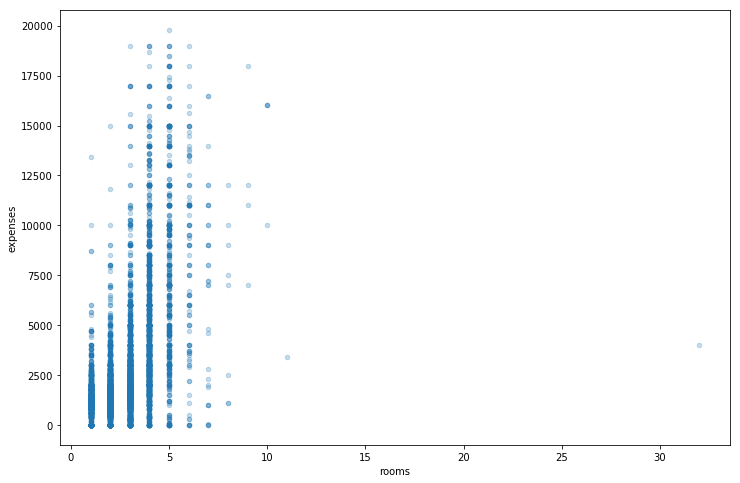

In [12]:
#Según la siguiente visualización , el número de ambientes no tendría tanta influencia sobre las expensas.
#Podría tener más influencia la zona en la que está ubicada la propiedad.

rooms_vs_exp = data.loc[data.state_name=='Capital Federal',['expenses','rooms']].dropna()
rooms_vs_exp.expenses = rooms_vs_exp.expenses.astype(int)
rooms_vs_exp.loc[(rooms_vs_exp.expenses<20000),: ].plot.scatter('rooms','expenses',alpha=0.25,figsize=(12,8));

# Evolución en el tiempo de la superficie total promedio en m2 de los departamentos de 2 ambientes

In [15]:
rooms= data.loc[(data.property_type == 'apartment') & (data.rooms < 12),['rooms','state_name','surface_total_in_m2','created_on']].dropna().drop_duplicates(keep='first')
rooms.loc[rooms['state_name'].str.contains('G.B.A'),'state_name']= 'GBA'
rooms.rooms = rooms.rooms.astype(int)


totalS = rooms.loc[(rooms.surface_total_in_m2<100) & (rooms.surface_total_in_m2>25) & (rooms.rooms == 3),['created_on','surface_total_in_m2','state_name']]
totalS.created_on = pd.to_datetime(totalS.created_on, format='%Y/%m/%d')
totalS['Periodo'] = totalS['created_on'].map(lambda x: x.strftime('%Y-%m'))
totalS.head(10)

,created_on,surface_total_in_m2,state_name,Periodo
8,2015-08-01,47.0,GBA,2015-08
166,2015-08-04,76.0,GBA,2015-08
307,2015-08-10,90.0,GBA,2015-08
334,2015-08-11,57.0,Capital Federal,2015-08
823,2015-08-25,75.0,GBA,2015-08
824,2015-08-25,69.0,GBA,2015-08
868,2015-08-26,59.0,GBA,2015-08
1063,2015-09-01,79.0,Capital Federal,2015-09
1170,2015-09-02,73.0,Capital Federal,2015-09
1252,2015-09-03,76.0,GBA,2015-09


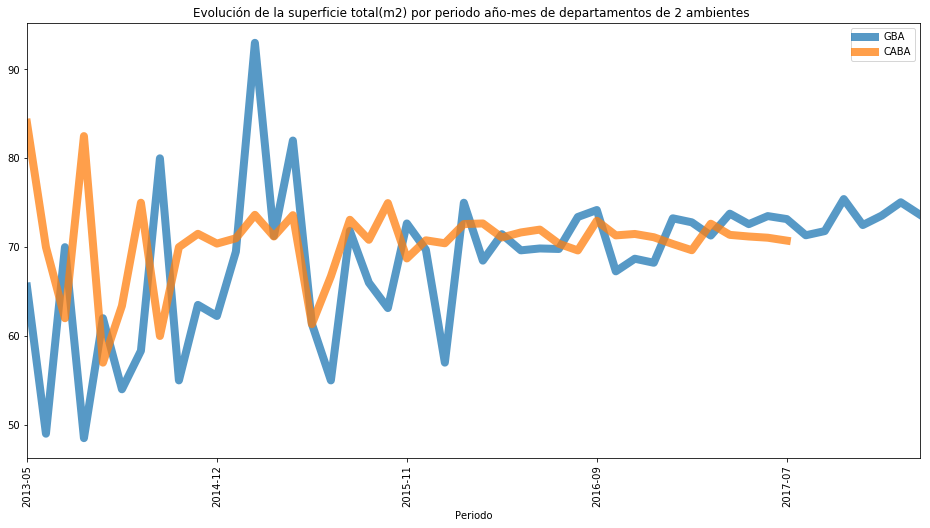

In [16]:
#En esta visualización se puede ver que en GBA se pusieron a la venta de manera más frecuente
#departamentos de 2 ambientes de menor tamaño que en Capital Federal. Se tendría que tener más información
#para poder aseverar si se trataban de viviendas nuevas.


plt.figure()
totalS.loc[totalS.state_name== 'GBA',['state_name','surface_total_in_m2','Periodo']].groupby('Periodo')\
                .mean().loc[:,'surface_total_in_m2'].plot(rot=90,linewidth=8,figsize=(16,8),alpha=0.75,label='GBA',title='Evolución de la superficie total(m2) por periodo año-mes de departamentos de 2 ambientes');

totalS.loc[totalS.state_name== 'Capital Federal',['state_name','surface_total_in_m2','Periodo']].groupby('Periodo')\
                .mean().loc[:,'surface_total_in_m2'].plot(rot=90,linewidth=8,figsize=(16,8),alpha=0.75,label='CABA',title='Evolución de la superficie total(m2) por periodo año-mes de departamentos de 2 ambientes ');
plt.legend();

In [17]:
#De cuántos ambientes son las casas ofrecidas ? 
houses= data.loc[(data.property_type == 'house') & (data.rooms<13),['created_on','price_usd_per_m2','state_name','place_name','rooms']].dropna().drop_duplicates(keep='first')

houses.rooms.value_counts()

4.0     3581
3.0     2706
5.0     2267
6.0      717
2.0      334
7.0      299
1.0      108
8.0       73
9.0       32
10.0      29
11.0       9
12.0       3
Name: rooms, dtype: int64

In [18]:
#selecciono las casas de 4 ambientes
houses = houses.loc[(houses.rooms==4) & (houses.price_usd_per_m2>15 ),:]

#calculo el top 10 de avisos en gba para el tipo de vivienda seleccionado
top10gba =houses.loc[(houses.state_name.str.contains('G.B.A')),['place_name']]\
                .groupby('place_name')['place_name'].agg(['size'])\
                .sort_values('size', ascending=False).head(10).reset_index()
        
#calculo el top 10 de avisos en Capital Federal para el tipo de vivienda seleccionado
top10caba =houses.loc[(houses.state_name=='Capital Federal'),['place_name']]\
                .groupby('place_name')['place_name'].agg(['size']).sort_values\
                ('size', ascending=False).head(10).reset_index()
        
#concateno para tener una lista de lugares con mayor cantidad de avisos de Capital Federal y GBA para comprar
mixedtop = pd.concat([top10gba,top10caba])
mixedtop

,place_name,size
0,Ramos Mejía,376
1,Haedo,222
2,Ituzaingó,171
3,Tigre,141
4,Olivos,81
5,Villa Ballester,80
6,Caseros,79
7,Escobar,79
8,Villa Luzuriaga,79
9,Pilar,75


In [21]:
#hago un merge de los lugares que figuraron en los top y los avisos de las casas de 4 amb 
selected_houses = pd.merge(houses,mixedtop,how='inner', on=['place_name'])
selected_houses.head(10)

,created_on,price_usd_per_m2,state_name,place_name,rooms,size
0,2015-08-03,883.333333,Bs.As. G.B.A. Zona Oeste,Haedo,4.0,222
1,2015-08-30,375.000000,Bs.As. G.B.A. Zona Oeste,Haedo,4.0,222
2,2015-09-16,1155.115512,Bs.As. G.B.A. Zona Oeste,Haedo,4.0,222
3,2015-09-16,1047.619048,Bs.As. G.B.A. Zona Oeste,Haedo,4.0,222
4,2015-09-23,2833.333333,Bs.As. G.B.A. Zona Oeste,Haedo,4.0,222
5,2015-10-15,1026.315789,Bs.As. G.B.A. Zona Oeste,Haedo,4.0,222
6,2015-11-01,560.000000,Bs.As. G.B.A. Zona Oeste,Haedo,4.0,222
7,2015-11-17,734.908136,Bs.As. G.B.A. Zona Oeste,Haedo,4.0,222
8,2015-12-09,1132.075472,Bs.As. G.B.A. Zona Oeste,Haedo,4.0,222
9,2016-01-12,966.183575,Bs.As. G.B.A. Zona Oeste,Haedo,4.0,222


In [22]:
selected_houses = selected_houses[['created_on','place_name','price_usd_per_m2','state_name']]
selected= selected_houses.pivot_table(index='created_on',columns=['place_name','state_name'])
selected.columns = selected.columns.droplevel()
meds = selected.median()
selected = selected[meds.index]

In [23]:
#se puede apreciar que la mediana en Capital Federal no es siempre mayor a la de GBA
meds.sort_values(ascending=False)

place_name        state_name              
Belgrano          Capital Federal             1976.923077
Villa Urquiza     Capital Federal             1882.379249
Villa Devoto      Capital Federal             1800.000000
Caballito         Capital Federal             1750.760269
Saavedra          Capital Federal             1630.434783
Olivos            Bs.As. G.B.A. Zona Norte    1623.811437
Villa del Parque  Capital Federal             1419.354839
Ramos Mejía       Bs.As. G.B.A. Zona Oeste    1293.309438
Liniers           Capital Federal             1104.516807
Haedo             Bs.As. G.B.A. Zona Oeste    1043.460925
Pilar             Bs.As. G.B.A. Zona Norte    1029.411765
Villa Luzuriaga   Bs.As. G.B.A. Zona Oeste    1008.333333
Mataderos         Capital Federal              987.749203
Barracas          Capital Federal              976.021548
Villa Lugano      Capital Federal              937.500000
Escobar           Bs.As. G.B.A. Zona Norte     900.000000
Caseros           Bs.As. G.B.

In [24]:
Media_price = selected_houses.loc[:,['price_usd_per_m2']].mean()
Media_price

price_usd_per_m2    1191.98178
dtype: float64

# ¿Cuánto varía el precio en usd por m2 de las casas de 4 amb ?

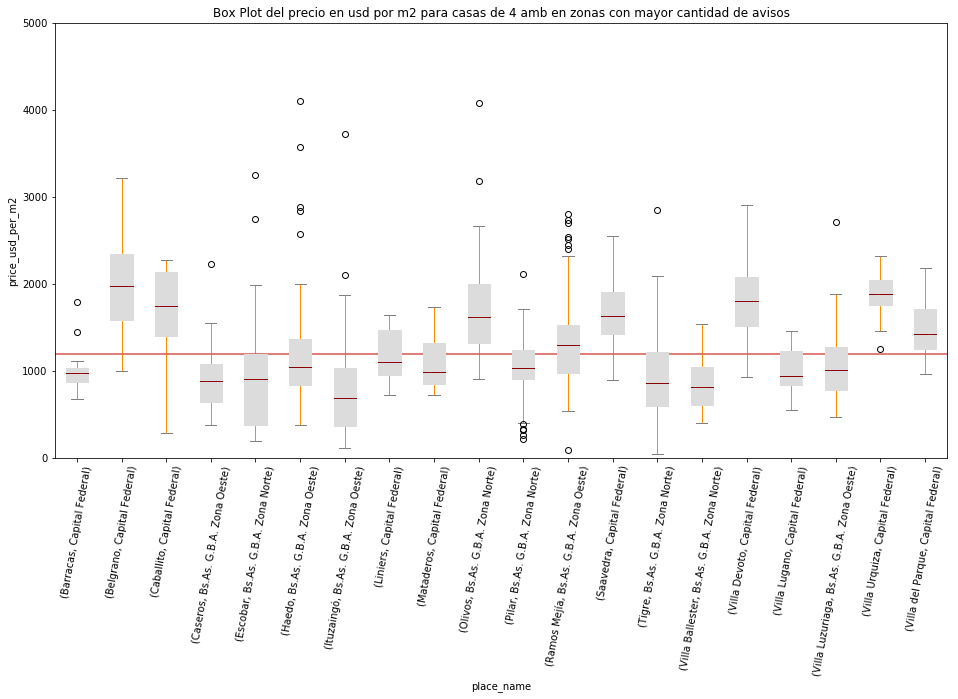

In [25]:
#En el siguiente gráfico se puede ver que en las zonas de Capital Federal donde hubo mayor variación
# en el precio en usd por m2 , éstas pueden tener, en cierta medida, un precio menor o igual al de
# algunas zonas de GBA ( por ejemplo Olivos,Haedo y Ramos Mejía )

props = dict(boxes="gainsboro", whiskers="DarkOrange", medians="DarkRed", caps="Gray")
boxplot=selected.plot.box(return_type='dict', figsize=(16,8),rot=80,title='Box Plot del precio en usd por m2 para casas de 4 amb en zonas con mayor cantidad de avisos',color=props, patch_artist=True);

ax=plt.gca()
ax.set_ylim([0,5000]);
ax.set_ylabel('price_usd_per_m2');
ax.set_xlabel('place_name');
plt.axhline(Media_price.price_usd_per_m2,color=sns.xkcd_rgb["pale red"])

# ¿ qué tipo de departamentos son los publicados ese año?

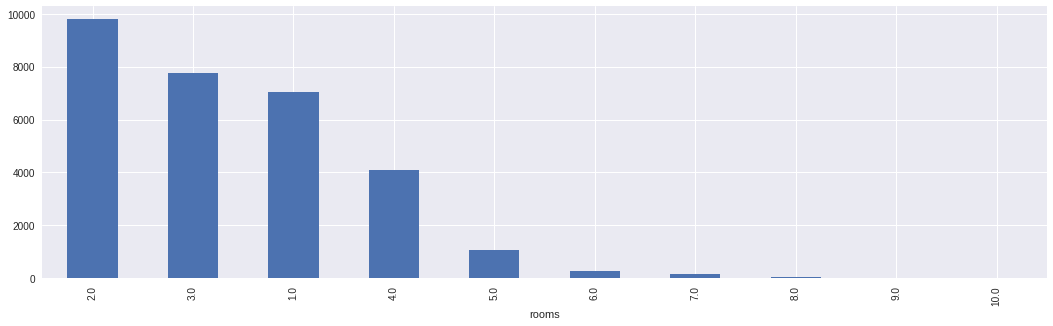

In [85]:
filtered = data.loc[(data.year == 2017) & (data.property_type == 'apartment') & (data.rooms > 0)]
grouped = filtered[['rooms','price_usd_per_m2']].groupby('rooms').agg([np.size, np.mean])
# por lo menos 50 ventas
grouped.loc[grouped[('price_usd_per_m2', 'size')] > 10, : ][('price_usd_per_m2','size')].sort_values(ascending=False).plot(kind='bar',figsize=(18,5));

# para los departamentos de 1, 2 y 3 habitaciones ¿cómo influye el piso en el precio de la propiedad ?

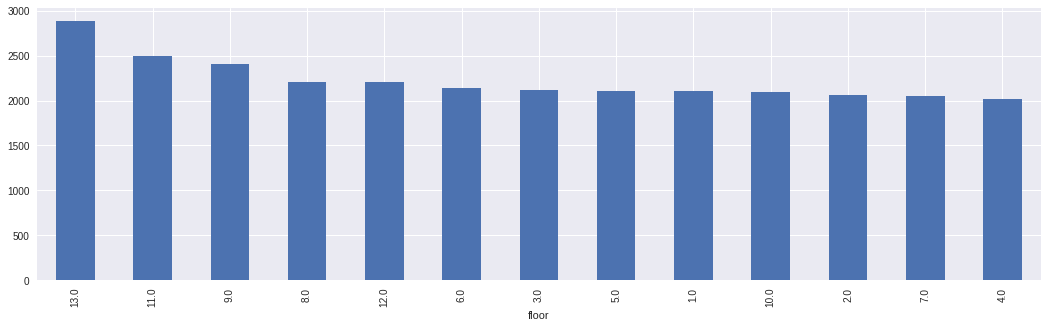

In [100]:
# rooms == 2, parece que no muestra nada interesante 

filtered = data.loc[(data.year == 2017) & (data.property_type == 'apartment') & (data.rooms == 2)]

grouped = filtered[['floor','price_usd_per_m2']].groupby('floor').agg([np.size, np.mean])

grouped.loc[grouped[('price_usd_per_m2', 'size')] > 10, : ][('price_usd_per_m2','mean')].sort_values(ascending=False).plot(kind='bar',figsize=(18,5));

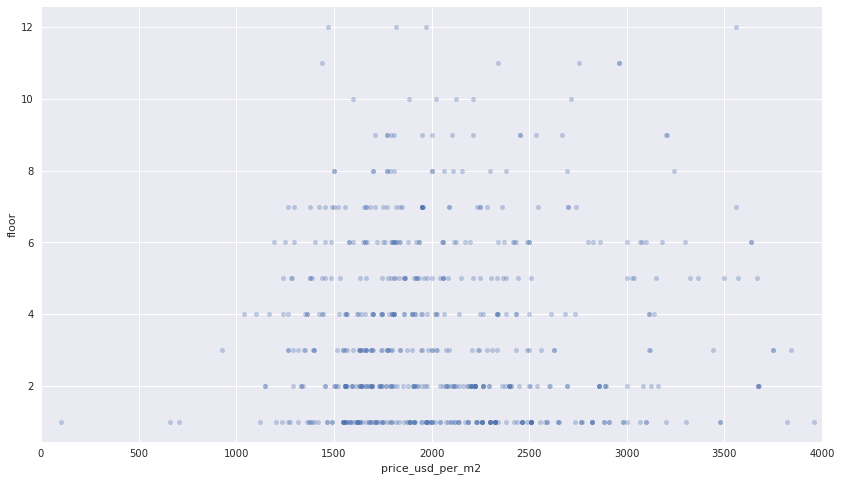

In [93]:
data_apart_floor = data[(data.year == 2017) & (data.property_type == 'apartment') & (data.floor < 13) &(data.rooms == 2)]

ax = plt.subplot(111)
data_apart_floor.plot.scatter('price_usd_per_m2','floor',alpha=0.32,figsize=(14,8),ax=ax);
ax.set_xlim(0,4000);

# ¿Cuáles son los principales lugares donde se registraron estas ventas?

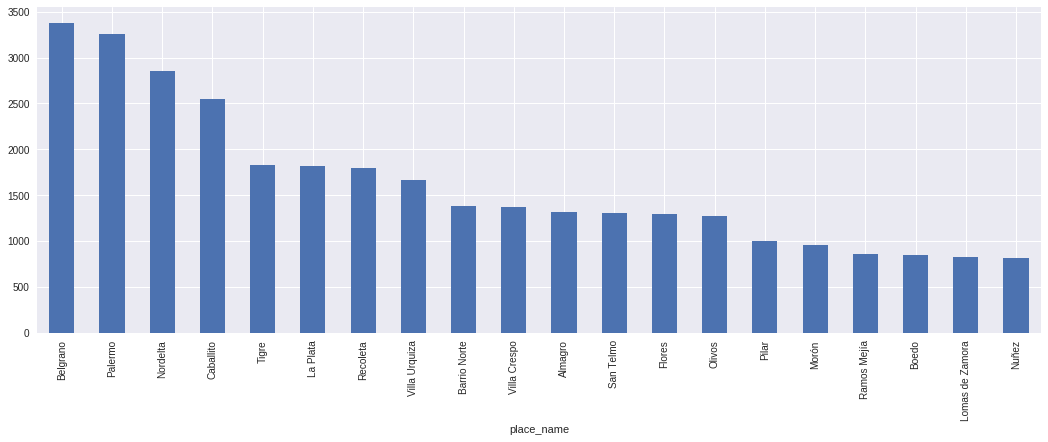

In [58]:
filtered = data.loc[(data.year == 2017) & (data.property_type == 'apartment')]
grouped = filtered.groupby(['place_name']).agg(['count'])

grouped = filtered[['place_name','price_usd_per_m2']].groupby('place_name').agg([np.size, np.mean])
# por lo menos 50 ventas
grouped.loc[grouped[('price_usd_per_m2', 'size')] > 50, : ][('price_usd_per_m2','size')].sort_values(ascending=False)[0:20].plot(kind='bar',figsize=(18,6));

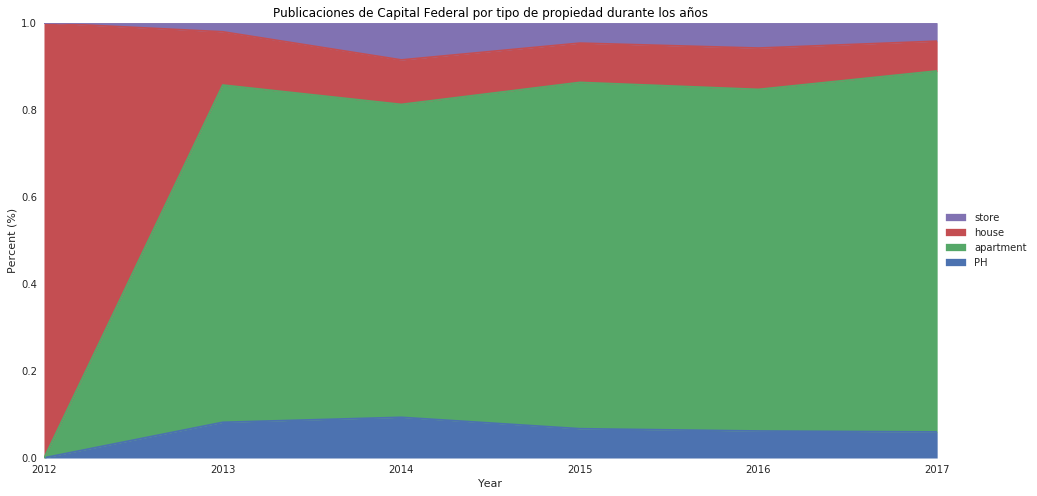

In [95]:
caba_year = pd.DataFrame(data.loc[data.state_name == 'Capital Federal'].groupby(['property_type','year']).size())
caba_year.columns = ['num']

caba_year.reset_index(inplace=True)

pivoted = pd.pivot_table(caba_year,values='num',columns='property_type', index='year')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

f = plt.figure()
plt.title('Publicaciones de Capital Federal por tipo de propiedad durante los años', color='black')
ax = pivoted.plot(kind='area', stacked=True,figsize=(16,8),ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Percent (%)');
ax.set_xlabel('Year');
ax.set_ylim(0,1)
plt.show()

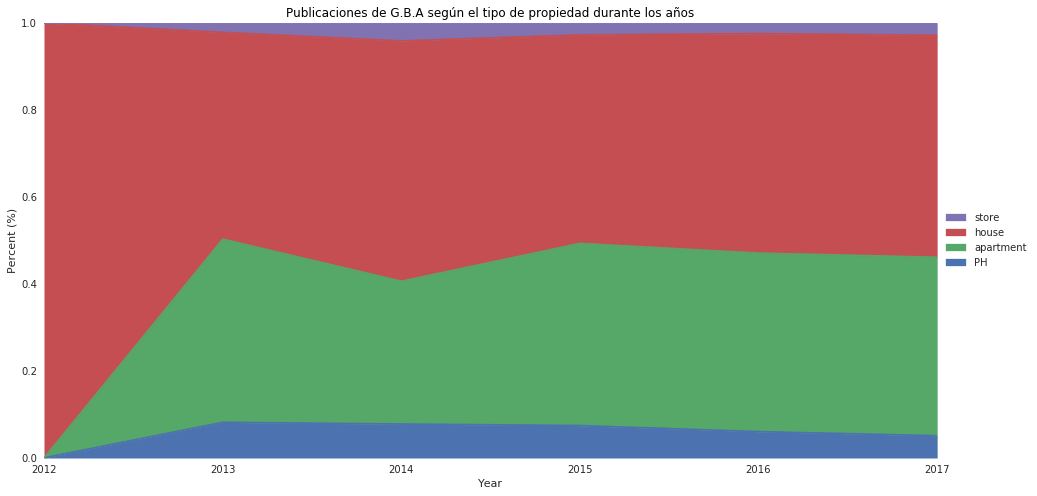

In [60]:
gba_year = pd.DataFrame(data.loc[data.state_name.str.contains('G.B.A')].groupby(['property_type','year']).size())
gba_year.columns = ['num']

gba_year.reset_index(inplace=True)

pivoted = pd.pivot_table(gba_year,values='num',columns='property_type', index='year')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

f = plt.figure()
plt.title('Publicaciones de G.B.A según el tipo de propiedad durante los años', color='black')
ax = pivoted.plot(kind='area', stacked=True,figsize=(16,8),ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Percent (%)');
ax.set_xlabel('Year');
ax.set_ylim(0,1)
plt.show()

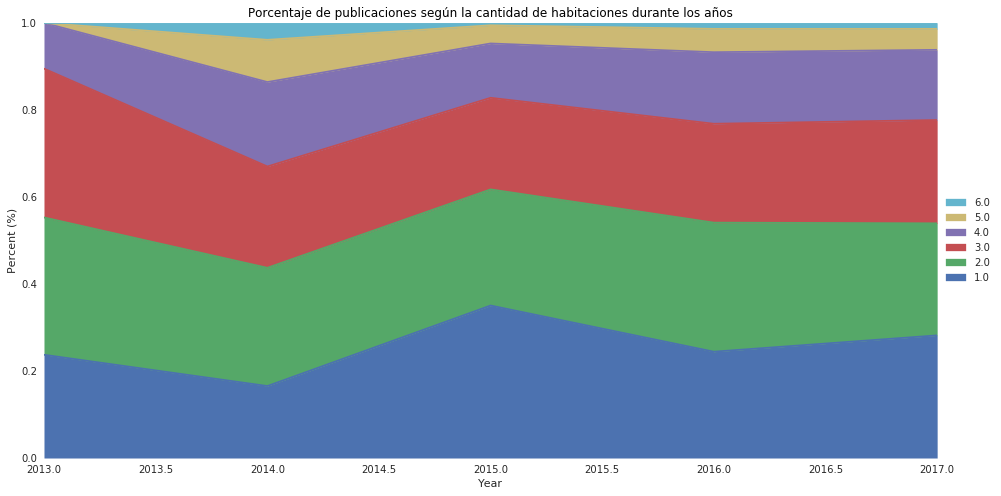

In [61]:
gy = pd.DataFrame(data.loc[(data.state_name == 'Capital Federal') & (data.property_type=='apartment')\
                          & (data.rooms < 7)].groupby(['rooms','year']).size())
gy.columns = ['num']

gy.reset_index(inplace=True)

pivoted = pd.pivot_table(gy,values='num',columns='rooms', index='year')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

f = plt.figure()
plt.title('Porcentaje de publicaciones según el número de ambientes durante los años', color='black')
ax = pivoted.plot(kind='area', stacked=True,figsize=(16,8),ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Percent (%)');
ax.set_xlabel('Year');
ax.set_ylim(0,1)
plt.show()

In [97]:
data_depto = data[data.property_type == 'apartment']

In [98]:
data_depto = data_depto[data_depto.rooms < 7]

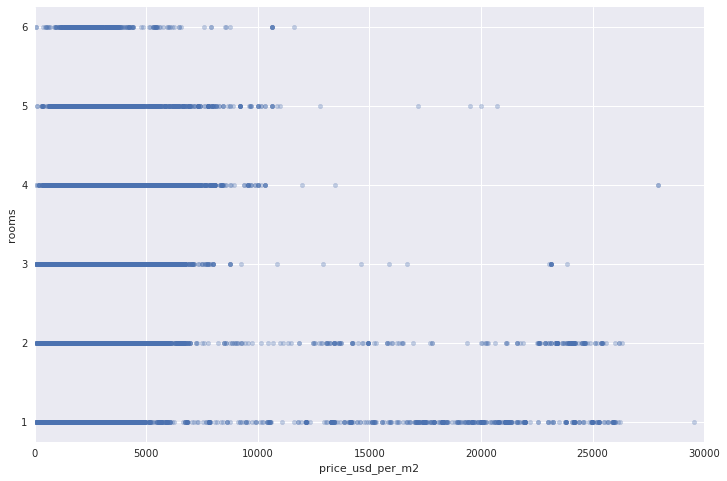

In [103]:
ax = plt.subplot(111)
data_depto.plot.scatter('price_usd_per_m2','rooms',alpha=0.32,figsize=(12,8),ax=ax);
ax.set_xlim(0,30000);

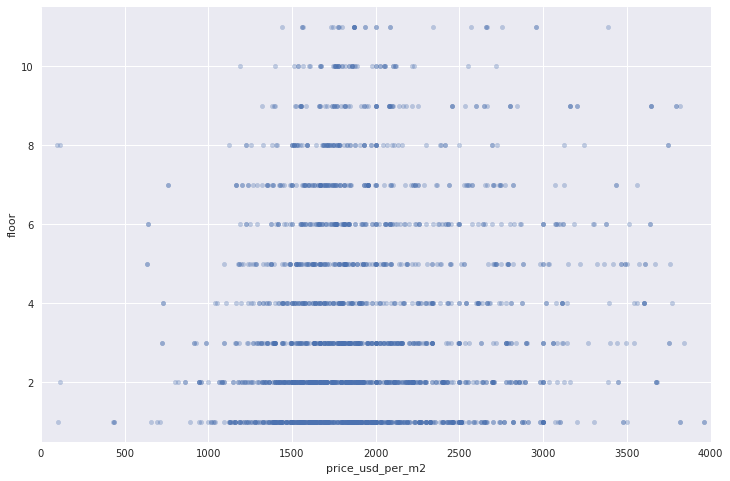

In [92]:
apartment_floor = data.loc[(data.property_type == 'apartment') & (data.rooms == 2), ['price_usd_per_m2','floor']]

ax = plt.subplot(111)
apartment_floor = apartment_floor.loc[(apartment_floor.floor < 12)]
apartment_floor.plot.scatter('price_usd_per_m2','floor',alpha=0.32,figsize=(12,8),ax=ax);
ax.set_xlim(0,4000);